In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

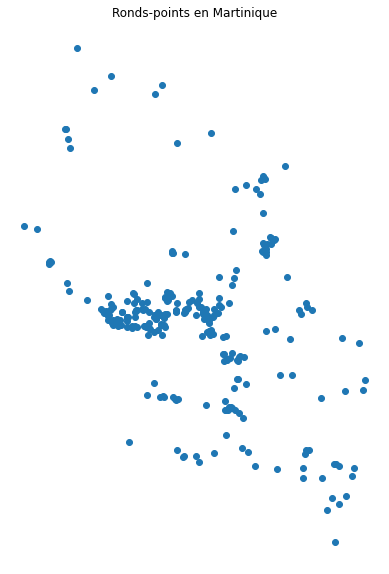

In [2]:
# roundabout data has been extracted from openstreetmap with overpass API: https://overpass-turbo.eu/s/1nh3
gdf_roundabout = gpd.read_file('data/roundabouts-martinique.geojson')

# Transform Lines into Points with centroids
initial_crs = gdf_roundabout.geometry.crs.srs
gdf_roundabout['geometry'] = gdf_roundabout['geometry'].to_crs('epsg:5756').centroid.to_crs(initial_crs)

ax = gdf_roundabout.plot(legend=True, figsize=(10,10))
ax.set_title('Ronds-points en Martinique')
_ = ax.axis('off')

plt.savefig('output/2022-11-01.png', bbox_inches='tight')

In [3]:
# Check if centroids could have been used directly
gdf_roundabout = gpd.read_file('data/roundabouts-martinique.geojson')

# Transform LineString into Points. Error should be minimal in our case, but a warning is send.
gdf_roundabout['points'] = gdf_roundabout.geometry.centroid

# Let's check anyway
initial_crs = gdf_roundabout.geometry.crs.srs
gdf_roundabout['pts'] = gdf_roundabout['geometry'].to_crs('epsg:5756').centroid.to_crs(initial_crs)

assert all(gdf_roundabout['points'] == gdf_roundabout['pts']), 'different centroid'

/tmp/ipykernel_104781/2232580748.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_roundabout['points'] = gdf_roundabout.geometry.centroid
